<a href="https://colab.research.google.com/github/raegar/AIProgramming2019/blob/master/Workbook_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

Import TensorFlow to make the AI

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

Numpy helps us to represent our data as highly performant lists.

In [2]:
import numpy as np

Set up training data

In [3]:
celcius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celcius_q):
  print("{} degrees Celcius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 72.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit


 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`.

Simplest model is a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

Further layers would only need the units/output value as it will inherit the input_shape from the previous layer.

In [4]:
#todo part 1
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

In [5]:
#todo part 2
model = tf.keras.Sequential([l0])

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models.

The learning rate (`0.7` in the code above) is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

In [6]:
#todo part 3
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.7))

Train the model by calling the `fit` method.

The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [7]:
#todo part 4
history = model.fit(celcius_q, fahrenheit_a, epochs=100, verbose=False)
print("Finished training model")

Finished training model


The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the predicted output is far from the expected output.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool).

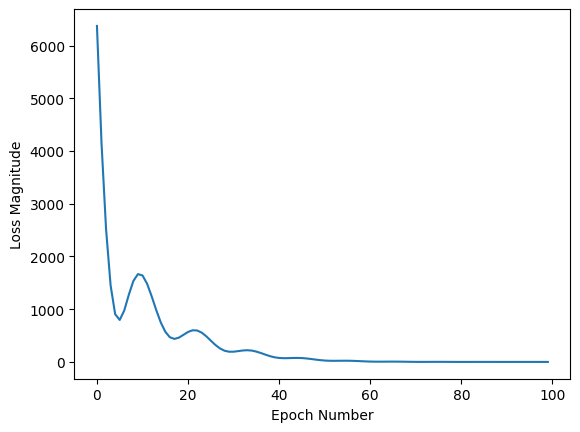

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

Once a model has been trained, you can use the predict method to throw in a completely new input to use and predict an output.
Useful to have test data for this separate from training data.

In [9]:
#todo part 5
print(model.predict([100]))

1/1 [==============================] - 0s 106ms/step
[[211.10823]]


We can look at the internal variables of the Dense layer. The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming lesson where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7884022]], dtype=float32), array([32.268005], dtype=float32)]


You can use more layers but when you look at the variables, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error', 
             optimizer=tf.keras.optimizers.Adam(0.7))
history = model.fit(celcius_q, fahrenheit_a, epochs=100, verbose=False)
print("Finished Training the Model")
print(model.predict([100]))
print("These are the layer variables: {}".format(l0.get_weights()))
print("These are the layer variables: {}".format(l1.get_weights()))
print("These are the layer variables: {}".format(l2.get_weights()))

Finished Training the Model
1/1 [==============================] - 0s 81ms/step
[[214.17905]]
These are the layer variables: [array([[0.76842934, 0.03888872, 0.40002224, 0.07206604]], dtype=float32), array([ 3.2580242,  6.4784193,  0.4252712, -2.5609267], dtype=float32)]
These are the layer variables: [array([[-3.3265605 ,  0.71353894,  0.88070756, -0.5957279 ],
       [-1.2823447 , -0.3156078 ,  1.5363295 ,  1.1785398 ],
       [ 0.29590455, -2.174594  ,  0.32973328,  1.5481131 ],
       [ 0.6000521 ,  0.89632916,  1.9629714 , -0.1892585 ]],
      dtype=float32), array([-3.8074067, -4.3947115, -7.410388 , -1.942676 ], dtype=float32)]
These are the layer variables: [array([[-0.85882556],
       [ 0.09157269],
       [-0.22468928],
       [-0.140271  ]], dtype=float32), array([12.665945], dtype=float32)]
